hi

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('16-Mall_Customers.csv')

from sklearn.preprocessing import StandardScaler

x = df.iloc[:,2:]
scaler = StandardScaler()
x = scaler.fit_transform(x)

pd.DataFrame(x)

gender = df['Gender']
df = pd.DataFrame(x, columns = ['age', 'income', 'spending score'])
df['Gender'] = gender

df.to_numpy()


array([[-1.4245687900521393, -1.7389991930659485, -0.43480147996914814,
        'Male'],
       [-1.2810354107017978, -1.7389991930659485, 1.195704069915157,
        'Male'],
       [-1.3528021003769686, -1.7008297638941763, -1.7159129834496736,
        'Female'],
       [-1.1375020313514563, -1.7008297638941763, 1.0404178270690327,
        'Female'],
       [-0.5633685139500905, -1.6626603347224038, -0.3959799192576171,
        'Female'],
       [-1.209268721026627, -1.6626603347224038, 1.0015962663575015,
        'Female'],
       [-0.2763017552494075, -1.6244909055506316, -1.7159129834496736,
        'Female'],
       [-1.1375020313514563, -1.6244909055506316, 1.700384359165061,
        'Female'],
       [1.804932245330544, -1.5863214763788591, -1.832377665584267,
        'Male'],
       [-0.6351352036252612, -1.5863214763788591, 0.8463100235113773,
        'Female'],
       [2.0202323143560563, -1.5863214763788591, -1.405340497757425,
        'Male'],
       [-0.2763017552494075, -

###
## Segmentation with Age vs Spending Score
###

<Axes: xlabel='age', ylabel='spending score'>

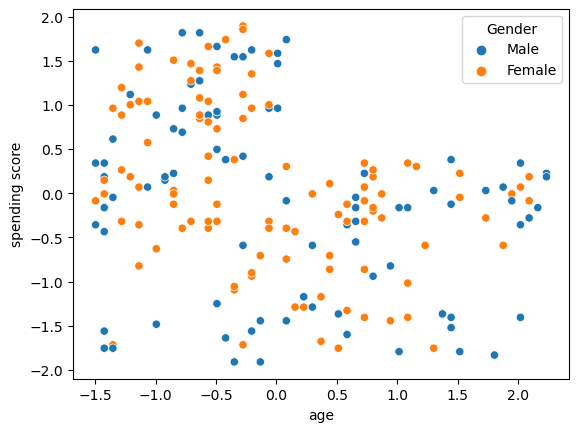

In [16]:
sns.scatterplot(data = df, x = 'age', y = 'spending score', hue = 'Gender')

In [17]:
columns = list(df.columns)

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 42)

x = df[['age', 'spending score']].to_numpy()
kmeans.fit(x)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [25]:
x

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

In [26]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [27]:
kmeans.cluster_centers_

array([[ 0.70892251, -0.69939115],
       [-0.75277339,  0.74265245]])

In [28]:
kmeans.inertia_

189.38749033992428

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


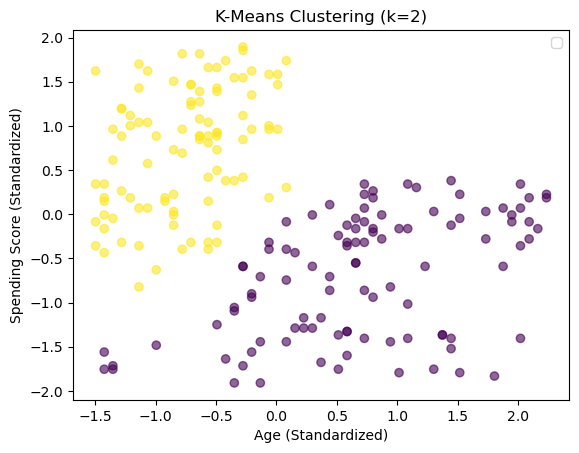

In [33]:
## import matplotlib.pyplot as plt

# Scatter plot of data points with cluster labels
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)

plt.xlabel('Age (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.show()


###
## Let's Go with 10 Rows Only:
###

In [62]:
from sklearn.cluster import KMeans
kmeanstwo = KMeans(n_clusters = 2, random_state = 42)

x = df[['age', 'spending score']].head(3)
kmeanstwo.fit(x)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [63]:
x

,age,spending score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913


In [64]:
kmeanstwo.labels_

array([1, 0, 1])

In [65]:
kmeanstwo.cluster_centers_

array([[-1.28103541,  1.19570407],
       [-1.38868545, -1.07535723]])

In [66]:
kmeanstwo.inertia_

0.8231985710485323

###
## Now to Understand How We Get,
- Centroids: [[-1.28103541,  1.19570407],
             [-1.38868545, -1.07535723]]
- Inertia: 0.8231985710485323.

### Consider the Following Pic of Background Operations and Formulas, also compare with notebook 16-3:
### 